In [ ]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from collections import Counter
import matplotlib.pyplot as plt


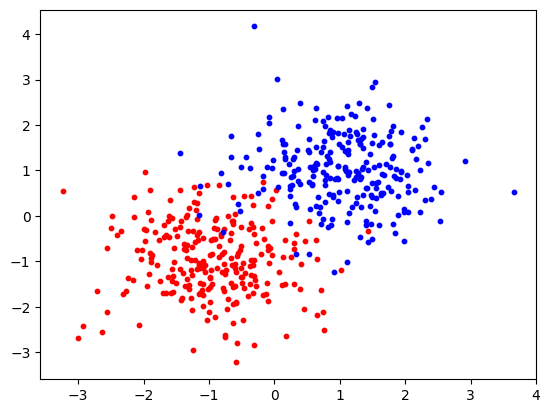

In [ ]:
#Generating Data
centers = [(-1, -1), (1, 1)]
cluster_std = [0.8, 0.8]

X, y = make_blobs(n_samples=500, cluster_std=cluster_std, centers=centers, n_features=2, random_state=1)

plt.scatter(X[y == 0, 0], X[y == 0, 1], color="red", s=10, label="Cluster1")
plt.scatter(X[y == 1, 0], X[y == 1, 1], color="blue", s=10, label="Cluster2")

In [ ]:
#Spolitting data into train test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [ ]:
#Helper function

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def accuracy(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy

In [ ]:
#KNN

class KNN:
  def __init__(self, k=3):
    self.k = k

  def fit(self, X, y):
    self.X_train = X
    self.y_train = y

  def predict(self, X):
    predicted_labels = [self._predict(x) for x in X]
    return np.array(predicted_labels)

  def _predict(self, x):

    #compute distance
    distance = [euclidean_distance(x, x_train) for x_train in self.X_train]

    #get k nearest sample
    k_indices = np.argsort(distance)[:self.k]
    k_nearest_labels = [self.y_train[i] for i in k_indices]

    #majority vote
    most_common = Counter(k_nearest_labels).most_common(1)
    return most_common[0][0]

In [ ]:
#testing

knn = KNN(5)

knn.fit(X_train, y_train)

prediction = knn.predict(X_test)

print('Accuracy: ', accuracy(prediction, y_test))

Accuracy:  0.9533333333333334


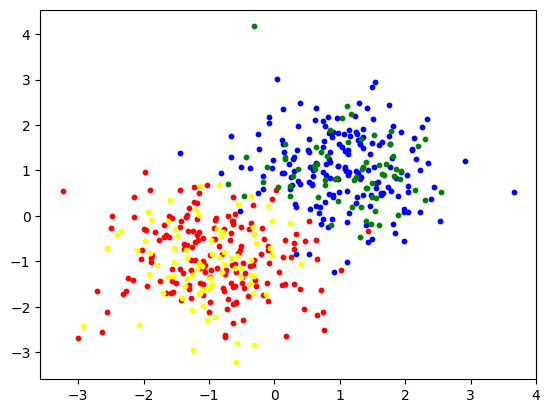

In [ ]:
#plotting the test result

plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], color="red", s=10, label="Cluster1")
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], color="blue", s=10, label="Cluster2")

plt.scatter(X_test[prediction == 0, 0], X_test[prediction == 0, 1], color="yellow", s=10, label="Cluster1")
plt.scatter(X_test[prediction == 1, 0], X_test[prediction == 1, 1], color="green", s=10, label="Cluster2")

(-4.0, 4.0)

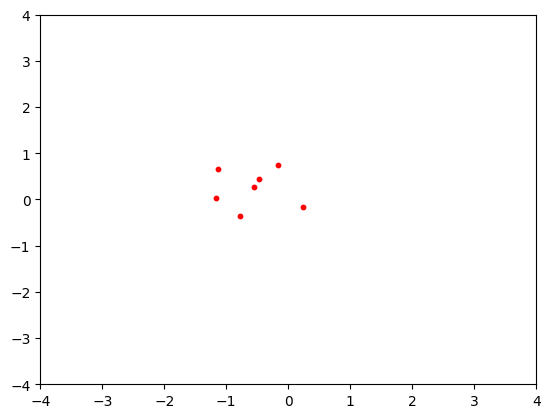

In [ ]:
#plotting the mislabeled data

plt.scatter(X_test[y_test != prediction, 0], X_test[y_test != prediction, 1], color="red", s=10,)
plt.xlim([-4,4])
plt.ylim([-4,4])